In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.metrics import mean_squared_error as mse
import warnings
warnings.filterwarnings('ignore')


ImportError: DLL load failed while importing _imaging: The specified module could not be found.

In [4]:
df = pd.read_csv('Areza_Timeseries_modified.csv')
df

,time,P,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m,Int
0,20200101:0007,0,0.00,0.00,0.00,0.00,14.60,2.28,0.0
1,20200101:0107,0,0.00,0.00,0.00,0.00,14.58,2.41,0.0
2,20200101:0207,0,0.00,0.00,0.00,0.00,14.31,2.41,0.0
3,20200101:0307,0,0.00,0.00,0.00,0.00,14.14,2.41,0.0
4,20200101:0407,2820000,16.48,15.36,0.12,2.77,13.88,2.41,0.0
...,...,...,...,...,...,...,...,...,...
8792,Int: 1 means solar radiation values are recons...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.dropna(subset=['time']) 
df.head(20)

,time,P,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m,Int
0,20200101:0007,0,0.00,0.00,0.00,0.00,14.60,2.28,0.0
1,20200101:0107,0,0.00,0.00,0.00,0.00,14.58,2.41,0.0
2,20200101:0207,0,0.00,0.00,0.00,0.00,14.31,2.41,0.0
3,20200101:0307,0,0.00,0.00,0.00,0.00,14.14,2.41,0.0
4,20200101:0407,2820000,16.48,15.36,0.12,2.77,13.88,2.41,0.0
5,20200101:0507,62422000,277.63,109.98,1.60,15.67,15.28,2.14,0.0
6,20200101:0607,103630000,502.96,145.76,3.12,27.82,19.63,2.21,0.0
7,20200101:0707,131242000,693.18,157.47,4.41,38.66,22.81,2.07,0.0
8,20200101:0807,145436000,811.12,167.39,5.31,47.15,24.98,1.52,0.0
9,20200101:0907,147766000,875.83,157.85,5.77,51.70,26.48,0.55,0.0


In [6]:
df = df[:8783:]
df.tail(10)

,time,P,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m,Int
8773,20201231:1307,75490000,378.84,112.82,2.75,24.30,28.17,3.79,0.0
8774,20201231:1407,30698000,153.32,73.27,1.18,11.89,27.06,3.52,0.0
8775,20201231:1507,0,0.00,0.00,0.00,0.00,25.05,2.55,0.0
8776,20201231:1607,0,0.00,0.00,0.00,0.00,23.26,1.79,0.0
8777,20201231:1707,0,0.00,0.00,0.00,0.00,21.20,1.31,0.0
8778,20201231:1807,0,0.00,0.00,0.00,0.00,20.16,1.24,0.0
8779,20201231:1907,0,0.00,0.00,0.00,0.00,18.79,1.31,0.0
8780,20201231:2007,0,0.00,0.00,0.00,0.00,17.26,1.52,0.0
8781,20201231:2107,0,0.00,0.00,0.00,0.00,15.86,1.59,0.0
8782,20201231:2207,0,0.00,0.00,0.00,0.00,14.42,1.72,0.0


In [7]:
df.index = pd.to_datetime(df['time'], format='%Y%m%d:%H%M')
df

,time,P,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m,Int
time,,,,,,,,,
2020-01-01 00:07:00,20200101:0007,0,0.00,0.00,0.00,0.00,14.60,2.28,0.0
2020-01-01 01:07:00,20200101:0107,0,0.00,0.00,0.00,0.00,14.58,2.41,0.0
2020-01-01 02:07:00,20200101:0207,0,0.00,0.00,0.00,0.00,14.31,2.41,0.0
2020-01-01 03:07:00,20200101:0307,0,0.00,0.00,0.00,0.00,14.14,2.41,0.0
2020-01-01 04:07:00,20200101:0407,2820000,16.48,15.36,0.12,2.77,13.88,2.41,0.0
...,...,...,...,...,...,...,...,...,...
2020-12-31 18:07:00,20201231:1807,0,0.00,0.00,0.00,0.00,20.16,1.24,0.0
2020-12-31 19:07:00,20201231:1907,0,0.00,0.00,0.00,0.00,18.79,1.31,0.0
2020-12-31 20:07:00,20201231:2007,0,0.00,0.00,0.00,0.00,17.26,1.52,0.0


<Axes: xlabel='time'>

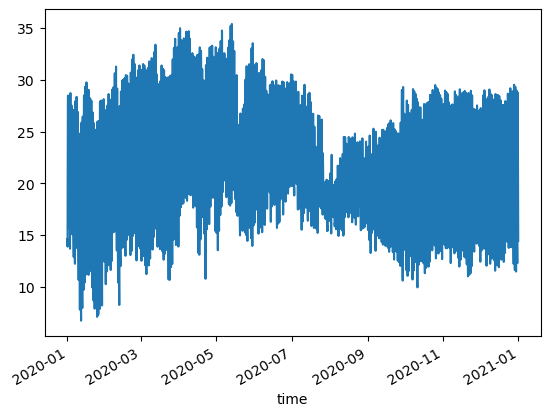

In [8]:
temp = df['T2m']
temp.plot()

In [9]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [10]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
# print(X1)
X1.shape, y1.shape

((8778, 5, 1), (8778,))

In [39]:
X_train1, y_train1 = X1[:8700], y1[:8700]
X_val1, y_val1 = X1[7001:7500], y1[7001:7500]
X_test1, y_test1 = X1[7501:], y1[7501:]
print(X_test1)
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape


[18.79]


((8700, 5, 1), (8700,), (499, 5, 1), (499,), (1277, 5, 1), (1277,))

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


2024-01-19 18:54:05.627851: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-19 18:54:05.628615: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-19 18:54:05.628963: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [13]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
# metrics , learning rate, loss  can be changed 
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [14]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10


2024-01-19 18:54:05.687930: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-01-19 18:54:05.805696: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-19 18:54:05.806270: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-19 18:54:05.806750: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

237/272 [=========================>....] - ETA: 0s - loss: 427.5696 - root_mean_squared_error: 20.6778

2024-01-19 18:54:06.665203: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-19 18:54:06.665811: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-19 18:54:06.666313: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-01-19 18:54:07.337466: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-19 18:54:07.338031: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-19 18:54:07.338731: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-01-19 18:54:07.709178: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'serving_default_input_1' with dtype float and shape [?,5,1]
	 [[{{node serving_default_input_1}}]]


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


272/272 [==============================] - 2s 6ms/step - loss: 415.9424 - root_mean_squared_error: 20.3947 - val_loss: 301.3033 - val_root_mean_squared_error: 17.3581
Epoch 2/10
245/272 [==========================>...] - ETA: 0s - loss: 236.4723 - root_mean_squared_error: 15.3777

2024-01-19 18:54:08.315951: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-19 18:54:08.316578: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-19 18:54:08.317021: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-01-19 18:54:08.783331: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-19 18:54:08.783987: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-19 18:54:08.784650: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


272/272 [==============================] - 1s 5ms/step - loss: 230.0771 - root_mean_squared_error: 15.1683 - val_loss: 146.5660 - val_root_mean_squared_error: 12.1064
Epoch 3/10
239/272 [=========================>....] - ETA: 0s - loss: 123.4430 - root_mean_squared_error: 11.1105

2024-01-19 18:54:09.686679: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-19 18:54:09.687412: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-19 18:54:09.687808: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-01-19 18:54:10.154541: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-19 18:54:10.155192: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-19 18:54:10.155872: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


272/272 [==============================] - 1s 5ms/step - loss: 118.4768 - root_mean_squared_error: 10.8847 - val_loss: 69.0425 - val_root_mean_squared_error: 8.3092
Epoch 4/10
240/272 [=========================>....] - ETA: 0s - loss: 60.6662 - root_mean_squared_error: 7.7888

2024-01-19 18:54:11.059537: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-19 18:54:11.060009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-19 18:54:11.060618: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-01-19 18:54:11.695189: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-19 18:54:11.695775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-19 18:54:11.696375: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


272/272 [==============================] - 2s 6ms/step - loss: 59.0144 - root_mean_squared_error: 7.6821 - val_loss: 40.4703 - val_root_mean_squared_error: 6.3616
Epoch 5/10
240/272 [=========================>....] - ETA: 0s - loss: 39.6560 - root_mean_squared_error: 6.2973

2024-01-19 18:54:12.588669: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-19 18:54:12.589188: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-19 18:54:12.589688: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-01-19 18:54:13.056913: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-19 18:54:13.057575: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-19 18:54:13.058197: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


272/272 [==============================] - 1s 5ms/step - loss: 39.0616 - root_mean_squared_error: 6.2499 - val_loss: 31.4704 - val_root_mean_squared_error: 5.6098
Epoch 6/10
235/272 [========================>.....] - ETA: 0s - loss: 29.6249 - root_mean_squared_error: 5.4429

2024-01-19 18:54:13.955100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-19 18:54:13.955601: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-19 18:54:13.956227: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-01-19 18:54:14.422358: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-19 18:54:14.422919: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-19 18:54:14.423590: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


272/272 [==============================] - 1s 5ms/step - loss: 29.1170 - root_mean_squared_error: 5.3960 - val_loss: 22.6983 - val_root_mean_squared_error: 4.7643
Epoch 7/10
242/272 [=========================>....] - ETA: 0s - loss: 22.0791 - root_mean_squared_error: 4.6988

2024-01-19 18:54:15.382071: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-19 18:54:15.382728: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-19 18:54:15.383113: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-01-19 18:54:16.078408: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-19 18:54:16.079155: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-19 18:54:16.079643: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


272/272 [==============================] - 2s 6ms/step - loss: 21.5863 - root_mean_squared_error: 4.6461 - val_loss: 15.4324 - val_root_mean_squared_error: 3.9284
Epoch 8/10
240/272 [=========================>....] - ETA: 0s - loss: 14.8152 - root_mean_squared_error: 3.8491

2024-01-19 18:54:16.973632: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-19 18:54:16.974153: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-19 18:54:16.974651: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-01-19 18:54:17.443090: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-19 18:54:17.443840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-19 18:54:17.444464: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


272/272 [==============================] - 1s 5ms/step - loss: 14.3501 - root_mean_squared_error: 3.7882 - val_loss: 8.7303 - val_root_mean_squared_error: 2.9547
Epoch 9/10
241/272 [=========================>....] - ETA: 0s - loss: 9.0994 - root_mean_squared_error: 3.0165

2024-01-19 18:54:18.336759: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-19 18:54:18.337235: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-19 18:54:18.337758: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-01-19 18:54:18.805810: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-19 18:54:18.806436: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-19 18:54:18.807056: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


272/272 [==============================] - 2s 6ms/step - loss: 8.8952 - root_mean_squared_error: 2.9825 - val_loss: 5.1623 - val_root_mean_squared_error: 2.2721
Epoch 10/10
240/272 [=========================>....] - ETA: 0s - loss: 5.9672 - root_mean_squared_error: 2.4428

2024-01-19 18:54:19.852998: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-19 18:54:19.853469: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-19 18:54:19.854006: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-01-19 18:54:20.269668: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-19 18:54:20.270384: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-19 18:54:20.270921: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-01-19 18:54:20.682460: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'serving_default_input_1' with dtype float and shape [?,5,1]
	 [[{{node serving_default_input_1}}]]


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


272/272 [==============================] - 1s 5ms/step - loss: 5.8067 - root_mean_squared_error: 2.4097 - val_loss: 3.3429 - val_root_mean_squared_error: 1.8284


In [15]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

2024-01-19 18:54:21.031544: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_2_grad_concat_split_2_split_dim' with dtype int32
	 [[{{node gradients_split_2_grad_concat_split_2_split_dim}}]]
2024-01-19 18:54:21.031595: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_grad_concat_split_split_dim' with dtype int32
	 [[{{node gradients_split_grad_concat_split_split_dim}}]]
2024-01-19 18:54:21.031625: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-01-19 18:54:21.308243: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_2_grad_concat_split_2_split_dim' with dtype int32
	 [[{{node gradients_split_2_grad_concat_split_2_split_dim}}]]
2024-01-19 18:54:21.308286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_grad_concat_split_split_dim' with dtype int32
	 [[{{node gradients_split_grad_concat_split_split_dim}}]]
2024-01-19 18:54:21.308313: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [16]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

2024-01-19 18:54:21.499808: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-19 18:54:21.500289: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-19 18:54:21.500893: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

272/272 [==============================] - 0s 403us/step


,Train Predictions,Actuals
0,14.722891,15.28
1,16.210680,19.63
2,20.327951,22.81
3,22.676569,24.98
4,24.175627,26.48
...,...,...
8695,26.178900,29.52
8696,26.230013,29.30
8697,26.225792,28.49
8698,26.145800,26.54


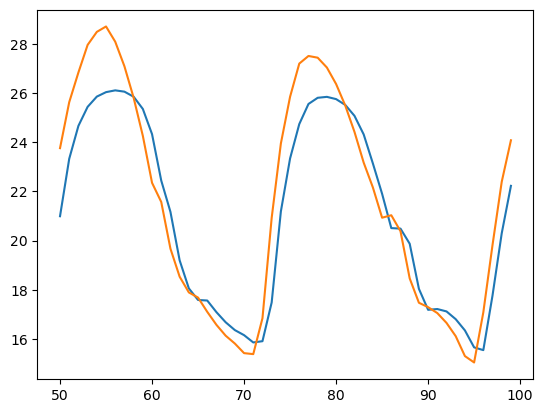

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [18]:

val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

16/16 [==============================] - 0s 507us/step


,Val Predictions,Actuals
0,15.048604,14.02
1,14.689562,13.73
2,14.536843,13.47
3,14.371911,13.19
4,14.162642,12.80
...,...,...
494,25.822159,27.45
495,25.852476,26.77
496,25.690329,26.02
497,25.363667,24.84


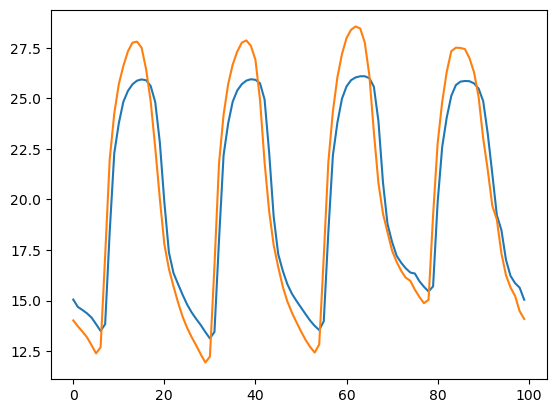

In [19]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [21]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

40/40 [==============================] - 0s 500us/step


,Test Predictions,Actuals
0,21.636503,20.50
1,20.040138,19.92
2,19.370388,19.33
3,18.855043,18.88
4,18.506159,18.04
...,...,...
1272,21.084669,20.16
1273,19.627729,18.79
1274,18.275465,17.26
1275,16.951349,15.86


In [22]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(predictions, y)

40/40 [==============================] - 0s 490us/step


(      Predictions  Actuals
 0       21.636503    20.50
 1       20.040138    19.92
 2       19.370388    19.33
 3       18.855043    18.88
 4       18.506159    18.04
 ...           ...      ...
 1272    21.084669    20.16
 1273    19.627729    18.79
 1274    18.275465    17.26
 1275    16.951349    15.86
 1276    15.863696    14.42
 
 [1277 rows x 2 columns],
 3.1683354016425933)

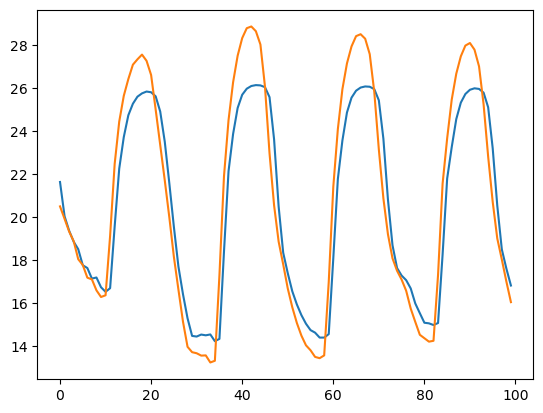

In [23]:
plot_predictions1(model1, X_test1, y_test1)

In [49]:
kkk = [[26.77],
  [26.02],
  [24.84],
  [23.43],
  [21.76]]

reshaped_array = np.reshape(kkk, (1, 5, 1))
predictions = model1.predict(reshaped_array).flatten()
predictions

1/1 [==============================] - 0s 14ms/step


array([21.636503], dtype=float32)

In [50]:

output = []
for i in range(0,24):
    input = kkk
    reshaped_array = np.reshape(input, (1, 5, 1))
    prediction = model1.predict(reshaped_array).flatten()
    output.append(prediction)
    kkk.append(prediction)
    del kkk[0]
output
    

1/1 [==============================] - 0s 6ms/step


[array([21.636503], dtype=float32),
 array([21.12141], dtype=float32),
 array([20.596983], dtype=float32),
 array([20.093449], dtype=float32),
 array([19.60705], dtype=float32),
 array([19.151306], dtype=float32),
 array([18.753084], dtype=float32),
 array([18.427843], dtype=float32),
 array([18.181608], dtype=float32),
 array([18.01097], dtype=float32),
 array([17.905344], dtype=float32),
 array([17.850374], dtype=float32),
 array([17.83107], dtype=float32),
 array([17.833986], dtype=float32),
 array([17.848433], dtype=float32),
 array([17.866816], dtype=float32),
 array([17.884409], dtype=float32),
 array([17.898787], dtype=float32),
 array([17.909155], dtype=float32),
 array([17.915724], dtype=float32),
 array([17.919214], dtype=float32),
 array([17.920494], dtype=float32),
 array([17.92038], dtype=float32),
 array([17.91954], dtype=float32)]